In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10, 10]

Sample from a spherically symmetric distribution of particles.

The quantile functions are:

$r(P) = RP^{1/3} \:$, where $R \doteq 1$ is the radius of the spherical distribution and $P \in [0,1]$ is the probability

$\phi(P) = 2\pi P$

$\theta(P) = \arccos(1-2P)$

In [2]:
N = int(1e5) # Number of particles
M = 1        # Total mass
R = 1        # Outer Radius
m = M/N      # Mass of the single particles

r = R*np.random.uniform(0, 1, N)**(1/3)
phi = 2*np.pi*np.random.uniform(0, 1, N)
theta = np.arccos(1-2*np.random.uniform(0, 1, N))

$\rho_0 = \dfrac{3M}{4\pi R^3}$

In [3]:
V = 4*np.pi*R**3
rho = 3*M/V
rho

0.238732414637843

$T_{collapse} = \sqrt{\dfrac{3\pi}{32G\rho_0}}$

In [4]:
T_collapse = np.sqrt((3*np.pi)/(32*rho))
print(f'The expected T_collapse = {T_collapse} iu')

The expected T_collapse = 1.1107207345395915 iu


In [5]:
V_final_approx = 4*np.pi*(R/5)**3
softening = (V_final_approx/N)**(1/3)
softening

0.010017667597712108

Check the PDFs

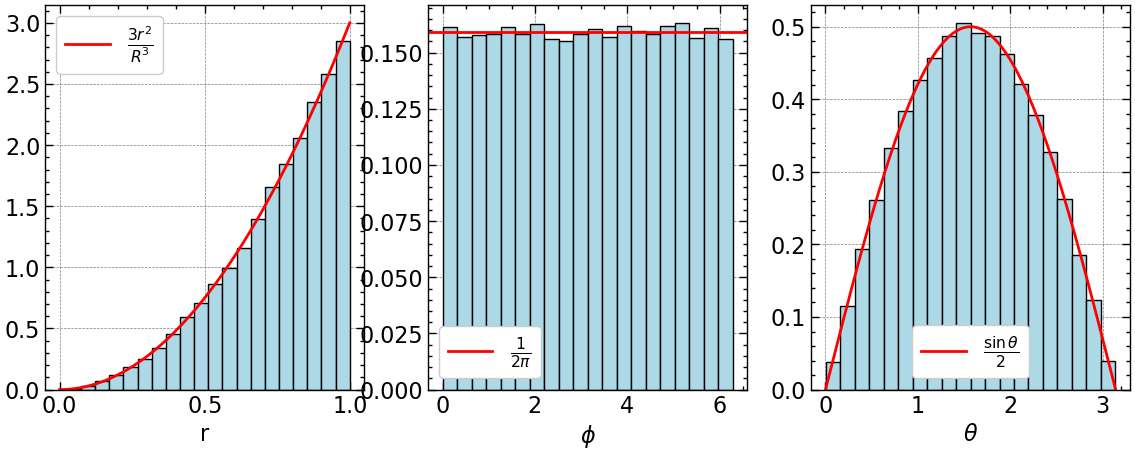

In [12]:
plt.rcParams['figure.figsize'] = [14, 5]
fig, axes = plt.subplots(1, 3)

ax = axes[0]
ax.hist(r, bins=20, density=True, color='lightblue', edgecolor='black');
x_dense = np.linspace(0, 1, 1000)
ax.plot(x_dense, 3*x_dense**2/R**3, color='red', label='$\\frac{3r^2}{R^3}$')
ax.set_xlabel('r')
ax.legend();

ax = axes[1]
ax.hist(phi, bins=20, density=True, color='lightblue', edgecolor='black');
x_dense = np.linspace(0, 2*np.pi, 1000)
ax.axhline(1/(2*np.pi), color='red', label='$\\frac{1}{2\pi}$')
ax.set_xlabel('$\phi$')
ax.legend();

ax = axes[2]
ax.hist(theta, bins=20, density=True, color='lightblue', edgecolor='black');
x_dense = np.linspace(0, np.pi, 1000)
ax.plot(x_dense, 0.5*np.sin(x_dense), color='red', label='$\\frac{\sin{\\theta}}{2}$')
ax.set_xlabel('$\\theta$')
ax.legend();

Transform from spherical coordinates to Cartesian coordinates

In [7]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

Plot the distribution of particles

100%|██████████| 100000/100000 [00:49<00:00, 2001.97it/s]


Text(0.5, 0, 'z')

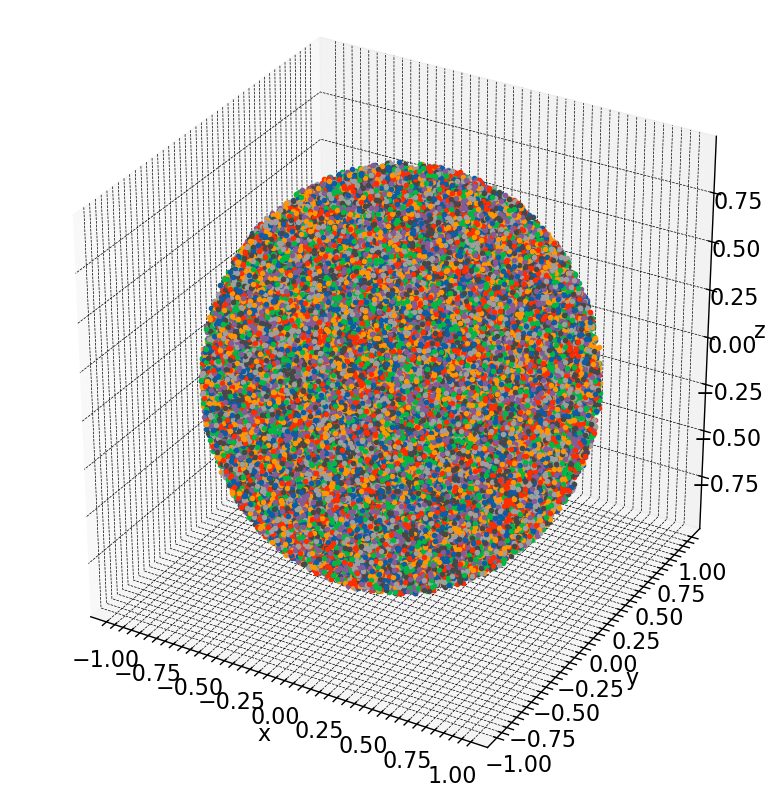

In [8]:
#%matplotlib widget

plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.set_box_aspect([1, 1, 1])

#for i in tqdm(range(len(x[:,]))):
#    ax.plot3D(x[i], y[i], z[i], 'o', markersize=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Create an input file for `nbody_sh1.C`

number_of_particles\
initial_time\
mass_1 x_1 y_1 z_1 vx_1 vy_1 vz_1\
mass_2 x_2 y_2 z_2 vx_2 vy_2 vz_2\
mass_3 x_3 y_3 z_3 vx_3 vy_3 vz_3\
...

In [9]:
vx = np.zeros(len(x))
vy = np.zeros(len(x))
vz= np.zeros(len(x))

In [10]:
# open the file
file = open('sphere.in', 'w')

# write the file
file.write(f'{N}\n')
file.write('3\n')
file.write('0\n')

for i in range(N):
    file.write(f'{m}\n')

for i in range(N):
    file.write(f'{x[i]} {y[i]} {z[i]}\n')
    
for i in range(N):
    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')

# close the file
file.close()